In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [ ]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [ ]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [ ]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [310]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [311]:
# Save references to each table
Station = Base.classes.station 
Measurement = Base.classes.measurement

In [312]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [313]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by((Measurement.date).desc()).first()
print(last_date)



('2017-08-23',)


/var/folders/7s/4s1l4ncs52ng9djx43_4r_xw0000gn/T/ipykernel_59589/612959042.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_names)


<Figure size 640x480 with 0 Axes>

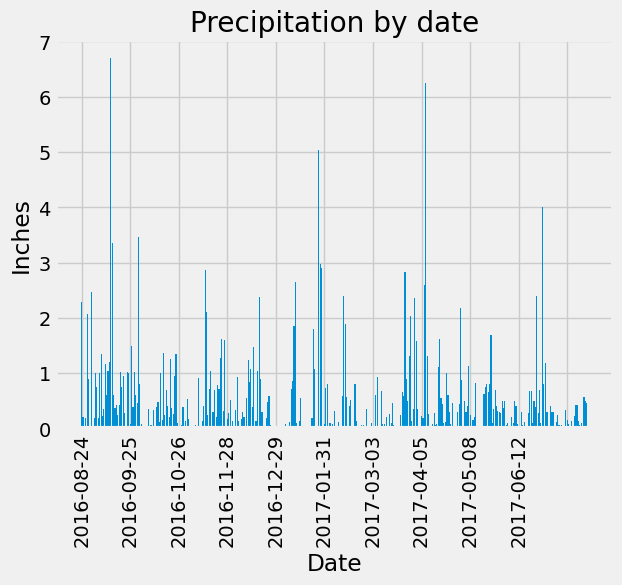

In [336]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

## This lines creates the date for the query
# Starting from the most recent data point in the database. 

new_date = last_date[0] #extrats the date from the tuple
year, month, day = map(int, new_date.split('-')) #splits the date and maps into an object
date_object = dt.datetime(year, month, day) #define as date object


# Calculate the date one year from the last date in data set.
year_ago = date_object - dt.timedelta(days=365) #creates a date for a year ago


# Perform a query to retrieve the data and precipitation scores
last_12_months = session.query(Measurement.station,Measurement.date,Measurement.prcp,Measurement.tobs).filter(Measurement.date > year_ago)


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(last_12_months)
df = df.rename(columns={'station': 'station', 'date': 'date', 'prcp': 'precipitation', 'tobs': 'temperature_observation'})

# Sort the dataframe by date
df = df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data

import matplotlib.ticker as mticker


fig, ax = plt.subplots()
ax.bar(df['date'], df['precipitation'])
ax.set_title('Precipitation by date')
ax.set_ylabel('Inches')
ax.set_xlabel('Date')
new_names=[df['date'].iloc[1,]]

size = df['date'].size
to_round = size/11

for i in range(0, 10):
    new_names.append((df['date'].iloc[round(roundz*i),]))

ax.set_xticklabels(new_names)
ax.tick_params(axis='x', labelrotation=90, which='major')
ax.xaxis.set_major_locator(mticker.MultipleLocator(35))
ax.xaxis.set_minor_locator(mticker.MultipleLocator(1))




plt.savefig('1.png')
plt.show()

In [317]:
# Use Pandas to calculate the summary statistics for the precipitation data
description = df['precipitation'].describe()
print(description)

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [318]:
# Design a query to calculate the total number of stations in the dataset
statiosn_count = session.query(Station.station).count()
statiosn_count


9

In [334]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_u = session.query(Station.station)
stations_u.all()

counting = []

for station_line in stations_u:
    recount = session.query(Measurement.station).filter(Measurement.station == station_line[0]).count()
    counting.append((station_line[0],recount))

sorted_data = sorted(counting, key=lambda x: x[1], reverse=True)

sorted_data

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [321]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

USC00519281_data = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
USC00519281_data

[(54.0, 85.0, 71.66378066378067)]

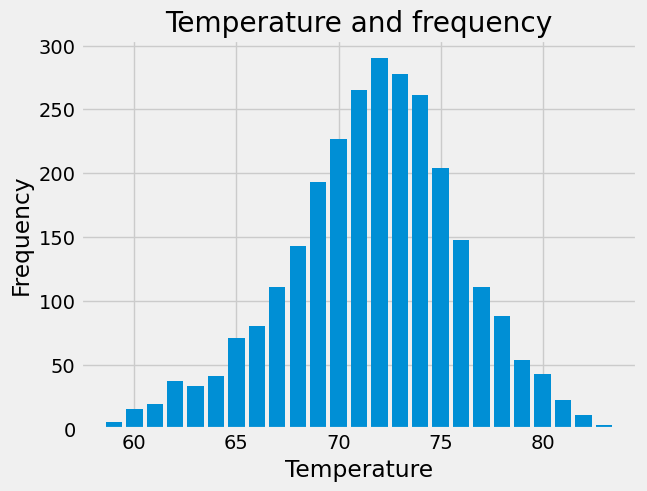

In [337]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_date_USC00519281 = session.query(Measurement.date).filter(Measurement.station == 'USC00519281').order_by((Measurement.date).desc()).first()

new_date_USC00519281 = last_date_USC00519281[0] #extrats the date from the tuple
year, month, day = map(int, new_date.split('-')) #splits the date and maps into an object
date_object_USC00519281 = dt.datetime(year, month, day) #define as date object


# Calculate the date one year from the last date in data set.
year_ago_USC00519281 = date_object_USC00519281 - dt.timedelta(days=365) #creates a date for a year ago



USC00519281_temperatures = session.query(Measurement.tobs).group_by(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date > year_ago_USC00519281).all()
USC00519281_temperatures


USC00519281_values = []
USC00519281_temps = []

for temp in USC00519281_temperatures:
    recount = session.query(Measurement.station).filter(Measurement.station == 'USC00519281').filter(Measurement.tobs == temp[0]).count()
    USC00519281_values.append(temp[0]) 
    USC00519281_temps.append(recount) 

    
chart = pd.DataFrame({'values': USC00519281_values,
     'temps': USC00519281_temps
    })

    
    



fig2, ax2 = plt.subplots()
ax2.bar(chart['values'], chart['temps'])
ax2.set_title('Temperature and frequency')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Temperature')


plt.savefig('2.png')
plt.show(fig2)


# Close Session

In [328]:
# Close Session
session.close()